# Input data processing

In [3]:
# Data ingestion
import pandas as pd
df=pd.read_csv('Clean Sales Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185949 entries, 0 to 185948
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   295665                                  185949 non-null  int64  
 1   Macbook Pro Laptop                      185949 non-null  object 
 2   1                                       185949 non-null  int64  
 3   1700                                    185949 non-null  float64
 4   2019-12-30 00:01:00.0000000             185949 non-null  object 
 5   136 Church St, New York City, NY 10001  185949 non-null  object 
 6   12                                      185949 non-null  int64  
 7   1700.1                                  185949 non-null  float64
 8   New York City                           185949 non-null  object 
 9   0                                       185949 non-null  int64  
 10  Night                                   1859

In [4]:
# Store the current header in the list
header_row=df.columns.tolist()

# Create a new DataFrame from the current data
data=df.copy()

#Insert the header row at the first position
data.loc[-1]=header_row
data.index=data.index+1
data=data.sort_index()

# Rename columns
data.columns=['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
              'Purchase Address', 'Month', 'Sales', 'City', 'Hour',
              'Day Part', 'Region', 'Product Category', 'Is Expensive',
              'Season', 'Holiday Season', 'Repeat Customer']

# Display the DataFrame
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Day Part,Region,Product Category,Is Expensive,Season,Holiday Season,Repeat Customer
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00.0000000,"136 Church St, New York City, NY 10001",12,1700.1,New York City,0,Night,Northeast,Electronics,Yes,Winter,No Holiday,No
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00.0000000,"562 2nd St, New York City, NY 10001",12,600.0,New York City,7,Morning,Northeast,Home Appliances,No,Winter,No Holiday,No
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00.0000000,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Afternoon,Northeast,Accessories,No,Winter,No Holiday,No
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00.0000000,"410 6th St, San Francisco, CA 94016",12,149.990005,San Francisco,15,Afternoon,West,Electronics,No,Winter,No Holiday,Yes
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Morning,South,Accessories,No,Winter,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00.0000000,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,Evening,Northeast,Accessories,No,Summer,No Holiday,Yes
185946,222906,27in FHD Monitor,1,149.990005,2019-06-01 19:29:00.0000000,"495 North St, New York City, NY 10001",6,149.990005,New York City,19,Evening,Northeast,Electronics,No,Summer,No Holiday,Yes
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00.0000000,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,Afternoon,West,Accessories,No,Summer,No Holiday,Yes
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00.0000000,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,Afternoon,West,Accessories,No,Summer,No Holiday,Yes


# Customer segmentation

In [6]:
!pip install yellowbrick

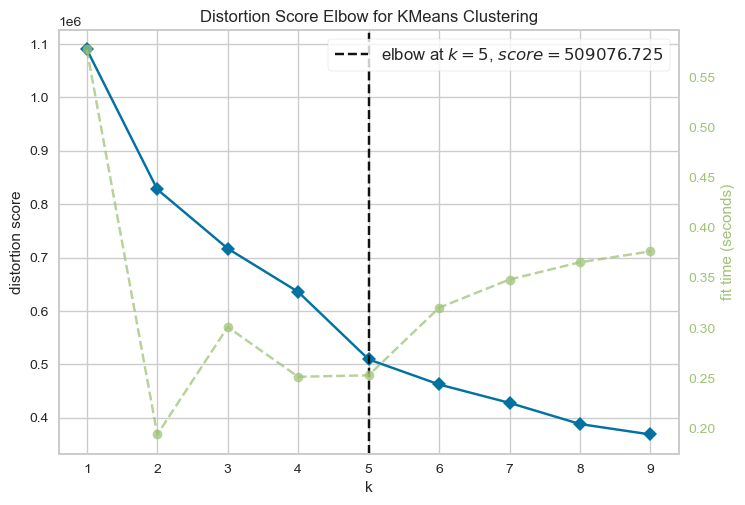

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

# Handle missing values
data=data.dropna()

# Convert columns to appropriate data types
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'], errors='coerce')
data['Price Each'] = pd.to_numeric(data['Price Each'], errors='coerce')
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data['Month'] = pd.to_numeric(data['Month'], errors='coerce')
data['Hour'] = pd.to_numeric(data['Hour'], errors='coerce')

# Remove rows with missing values after conversion
data=data.dropna()

# Process for data preprocessing and normalization
numeric_features=['Quantity Ordered', 'Price Each', 'Month', 'Sales', 'Hour']
categorical_features=['City']

# Create transformers for normalization
numeric_transformer=make_pipeline(StandardScaler(), )
categorical_transformer=OneHotEncoder()

# Preprocessing pipeline
preprocessor=ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Normalize data
data_pro=preprocessor.fit_transform(data)

# Retrieve the names of the normalized columns
categorical_transformer.fit(data[categorical_features])
city_categories=categorical_transformer.get_feature_names_out(categorical_features)

# Combine the names of numerical feature columns and categorical feature columns (encoding)
col_names=numeric_features +list(city_categories)

# Convert the normalized data into a DataFrame
data_pro=pd.DataFrame(data_pro, columns=col_names)

# Elbow method for determining the number of clusters
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer =KElbowVisualizer(model, k=(1, 10))

visualizer.fit(data_pro)
visualizer.show()

In [8]:
# Initialize and train the K-means model with k=4
kmeans=KMeans(n_clusters=4, random_state=0)
data['Cluster']=kmeans.fit_predict(data_pro)

# Display the clusters
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Day Part,Region,Product Category,Is Expensive,Season,Holiday Season,Repeat Customer,Cluster
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00.0000000,"136 Church St, New York City, NY 10001",12,1700.100000,New York City,0,Night,Northeast,Electronics,Yes,Winter,No Holiday,No,3
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00.0000000,"562 2nd St, New York City, NY 10001",12,600.000000,New York City,7,Morning,Northeast,Home Appliances,No,Winter,No Holiday,No,3
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00.0000000,"277 Main St, New York City, NY 10001",12,11.950000,New York City,18,Afternoon,Northeast,Accessories,No,Winter,No Holiday,No,0
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00.0000000,"410 6th St, San Francisco, CA 94016",12,149.990005,San Francisco,15,Afternoon,West,Electronics,No,Winter,No Holiday,Yes,0
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301",12,11.950000,Atlanta,12,Morning,South,Accessories,No,Winter,No Holiday,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.990000,2019-06-07 19:02:00.0000000,"795 Pine St, Boston, MA 02215",6,2.990000,Boston,19,Evening,Northeast,Accessories,No,Summer,No Holiday,Yes,1
185946,222906,27in FHD Monitor,1,149.990005,2019-06-01 19:29:00.0000000,"495 North St, New York City, NY 10001",6,149.990005,New York City,19,Evening,Northeast,Electronics,No,Summer,No Holiday,Yes,1
185947,222907,USB-C Charging Cable,1,11.950000,2019-06-22 18:57:00.0000000,"319 Ridge St, San Francisco, CA 94016",6,11.950000,San Francisco,18,Afternoon,West,Accessories,No,Summer,No Holiday,Yes,1
185948,222908,USB-C Charging Cable,1,11.950000,2019-06-26 18:35:00.0000000,"916 Main St, San Francisco, CA 94016",6,11.950000,San Francisco,18,Afternoon,West,Accessories,No,Summer,No Holiday,Yes,1


In [9]:
# Convert the values in the Cluster column
cluster_map={
    0:'Cluster 1',
    1:'Cluster 2',
    2:'Cluster 3',
    3:'Cluster 4'
}
data['Cluster']=data['Cluster'].map(cluster_map)

# Create a new column containing the standardized state codes
city_codes = {
    'New York City': 'NY',        # Mã tiểu bang New York
    'San Francisco': 'CA',        # Mã tiểu bang California
    'Atlanta': 'GA',              # Mã tiểu bang Georgia
    'Portland': 'OR',             # Mã tiểu bang Oregon
    'Dallas': 'TX',               # Mã tiểu bang Texas
    'Los Angeles': 'CA',          # Mã tiểu bang California
    'Boston': 'MA',               # Mã tiểu bang Massachusetts
    'Austin': 'TX',               # Mã tiểu bang Texas
    'Seattle': 'WA'               # Mã tiểu bang Washington
}

data['City Code']=data['City'].map(city_codes)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Day Part,Region,Product Category,Is Expensive,Season,Holiday Season,Repeat Customer,Cluster,City Code
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00.0000000,"136 Church St, New York City, NY 10001",12,1700.100000,New York City,0,Night,Northeast,Electronics,Yes,Winter,No Holiday,No,Cluster 4,NY
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00.0000000,"562 2nd St, New York City, NY 10001",12,600.000000,New York City,7,Morning,Northeast,Home Appliances,No,Winter,No Holiday,No,Cluster 4,NY
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00.0000000,"277 Main St, New York City, NY 10001",12,11.950000,New York City,18,Afternoon,Northeast,Accessories,No,Winter,No Holiday,No,Cluster 1,NY
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00.0000000,"410 6th St, San Francisco, CA 94016",12,149.990005,San Francisco,15,Afternoon,West,Electronics,No,Winter,No Holiday,Yes,Cluster 1,CA
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301",12,11.950000,Atlanta,12,Morning,South,Accessories,No,Winter,No Holiday,No,Cluster 1,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.990000,2019-06-07 19:02:00.0000000,"795 Pine St, Boston, MA 02215",6,2.990000,Boston,19,Evening,Northeast,Accessories,No,Summer,No Holiday,Yes,Cluster 2,MA
185946,222906,27in FHD Monitor,1,149.990005,2019-06-01 19:29:00.0000000,"495 North St, New York City, NY 10001",6,149.990005,New York City,19,Evening,Northeast,Electronics,No,Summer,No Holiday,Yes,Cluster 2,NY
185947,222907,USB-C Charging Cable,1,11.950000,2019-06-22 18:57:00.0000000,"319 Ridge St, San Francisco, CA 94016",6,11.950000,San Francisco,18,Afternoon,West,Accessories,No,Summer,No Holiday,Yes,Cluster 2,CA
185948,222908,USB-C Charging Cable,1,11.950000,2019-06-26 18:35:00.0000000,"916 Main St, San Francisco, CA 94016",6,11.950000,San Francisco,18,Afternoon,West,Accessories,No,Summer,No Holiday,Yes,Cluster 2,CA


# Save the data

In [11]:
data.to_csv('Cluster_Customer.csv', index=False)

In [20]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Day Part,Region,Product Category,Is Expensive,Season,Holiday Season,Repeat Customer,Cluster,City Code
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00.0000000,"136 Church St, New York City, NY 10001",12,1700.100000,New York City,0,Night,Northeast,Electronics,Yes,Winter,No Holiday,No,Cluster 4,NY
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00.0000000,"562 2nd St, New York City, NY 10001",12,600.000000,New York City,7,Morning,Northeast,Home Appliances,No,Winter,No Holiday,No,Cluster 4,NY
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00.0000000,"277 Main St, New York City, NY 10001",12,11.950000,New York City,18,Afternoon,Northeast,Accessories,No,Winter,No Holiday,No,Cluster 1,NY
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00.0000000,"410 6th St, San Francisco, CA 94016",12,149.990005,San Francisco,15,Afternoon,West,Electronics,No,Winter,No Holiday,Yes,Cluster 1,CA
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301",12,11.950000,Atlanta,12,Morning,South,Accessories,No,Winter,No Holiday,No,Cluster 1,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.990000,2019-06-07 19:02:00.0000000,"795 Pine St, Boston, MA 02215",6,2.990000,Boston,19,Evening,Northeast,Accessories,No,Summer,No Holiday,Yes,Cluster 2,MA
185946,222906,27in FHD Monitor,1,149.990005,2019-06-01 19:29:00.0000000,"495 North St, New York City, NY 10001",6,149.990005,New York City,19,Evening,Northeast,Electronics,No,Summer,No Holiday,Yes,Cluster 2,NY
185947,222907,USB-C Charging Cable,1,11.950000,2019-06-22 18:57:00.0000000,"319 Ridge St, San Francisco, CA 94016",6,11.950000,San Francisco,18,Afternoon,West,Accessories,No,Summer,No Holiday,Yes,Cluster 2,CA
185948,222908,USB-C Charging Cable,1,11.950000,2019-06-26 18:35:00.0000000,"916 Main St, San Francisco, CA 94016",6,11.950000,San Francisco,18,Afternoon,West,Accessories,No,Summer,No Holiday,Yes,Cluster 2,CA
